In [837]:
import pandas as pd
df=pd.read_csv("gapminder.tsv",delimiter="\t")
pd.set_option('display.float_format', lambda x: '%.9f' % x)

In [838]:
df
df["pop"]=df["pop"]/1000000
df.rename(columns={"pop":"Population","lifeExp":"Life Expectancy","year":"Year","continent":"Continent"},inplace=True)

In [839]:
df.describe()

,Year,Life Expectancy,Population,gdpPercap
count,1704.000000000,1704.000000000,1704.000000000,1704.000000000
mean,1979.500000000,59.474439366,29.601212325,7215.327081212
std,17.265329509,12.917107415,106.157896744,9857.454542541
min,1952.000000000,23.599000000,0.060011000,241.165876500
25%,1965.750000000,48.198000000,2.793664000,1202.060309250
50%,1979.500000000,60.712500000,7.023595500,3531.846988500
75%,1993.250000000,70.845500000,19.585221750,9325.462346000
max,2007.000000000,82.603000000,1318.683096000,113523.132900000


In [840]:
lifeexp=df.pivot_table(index="Year",aggfunc={"Life Expectancy":"mean"})

<AxesSubplot:title={'center':'Life Expectancy (Years)'}, xlabel='Year'>

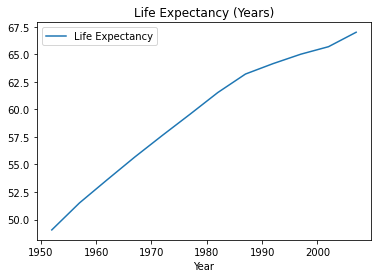

In [881]:
lifeexp.plot.line(title="Life Expectancy (Years)")

In [842]:
pop=df.pivot_table(index="Year",aggfunc={"Population":"mean"})

<AxesSubplot:title={'center':'Population (Millions)'}, xlabel='Year'>

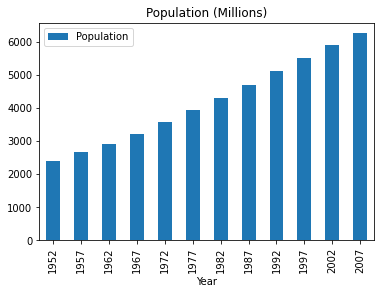

In [876]:
pop.plot.bar(title="Population (Millions)")

In [844]:
mask=df["Continent"]=="Africa"
africa=df[mask]
africa=africa[["Continent","Year","Population"]]
africa.sort_values("Population")

,Continent,Year,Population
1296,Africa,1952,0.060011000
1297,Africa,1957,0.061325000
420,Africa,1952,0.063149000
1298,Africa,1962,0.065345000
1299,Africa,1967,0.070787000
...,...,...,...
1135,Africa,1987,81.551520000
1136,Africa,1992,93.364244000
1137,Africa,1997,106.207839000
1138,Africa,2002,119.901274000


<AxesSubplot:title={'center':'Population (Millions)'}, xlabel='Year'>

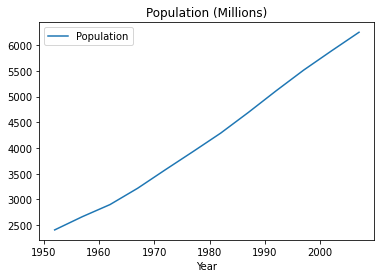

In [875]:
pop=df.pivot_table(index="Year",values="Population",aggfunc={"Population":"sum"})#.plot(x="year",y="Population")
pop.plot(y="Population",title="Population (Millions)")

In [846]:
dfall=df.pivot_table(index=["Year"],columns="Continent",values="Life Expectancy",aggfunc={"Life Expectancy":"mean"})#.plot(x="year",y="Population")
dfall=dfall.reset_index()
dfall

Continent,Year,Africa,Americas,Asia,Europe,Oceania
0,1952,39.135500000,53.279840000,46.314393939,64.408500000,69.255000000
1,1957,41.266346154,55.960280000,49.318544242,66.703066667,70.295000000
2,1962,43.319442308,58.398760000,51.563223030,68.539233333,71.085000000
3,1967,45.334538462,60.410920000,54.663640000,69.737600000,71.310000000
4,1972,47.450942308,62.394920000,57.319269091,70.775033333,71.910000000
5,1977,49.580423077,64.391560000,59.610556364,71.937766667,72.855000000
6,1982,51.592865385,66.228840000,62.617939394,72.806400000,74.290000000
7,1987,53.344788462,68.090720000,64.851181818,73.642166667,75.320000000
8,1992,53.629576923,69.568360000,66.537212121,74.440100000,76.945000000
9,1997,53.598269231,71.150480000,68.020515152,75.505166667,78.190000000


<AxesSubplot:title={'center':'Average Life Expectancy'}, xlabel='Year'>

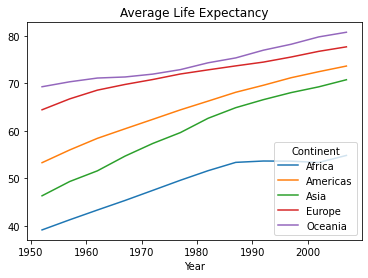

In [847]:
dfall.plot.line(x="Year",y=["Africa","Americas","Asia","Europe","Oceania"],title="Average Life Expectancy")


In [848]:
dfallpop=df.pivot_table(index=["Year"],columns="Continent",values="Population",aggfunc={"Population":"sum"})#.plot(x="year",y="Population")
dfallpop.reset_index(inplace=True)
dfallpop

Continent,Year,Africa,Americas,Asia,Europe,Oceania
0,1952,237.640501000,345.152446000,1395.357351000,418.120846000,10.686006000
1,1957,264.837738000,386.953916000,1562.780599000,437.890351000,11.941976000
2,1962,296.516865000,433.270254000,1696.357182000,460.355155000,13.283518000
3,1967,335.289489000,480.746623000,1905.662900000,481.178958000,14.600414000
4,1972,379.879541000,529.384210000,2150.972248000,500.635059000,16.106100000
5,1977,433.061021000,578.067699000,2384.513556000,517.164531000,17.239000000
6,1982,499.348587000,630.290920000,2610.135582000,531.266901000,18.394850000
7,1987,574.834110000,682.753971000,2871.220762000,543.094160000,19.574415000
8,1992,659.081517000,739.274104000,3133.292191000,558.142797000,20.919651000
9,1997,743.832984000,796.900410000,3383.285500000,568.944148000,22.241430000


array([[<AxesSubplot:xlabel='Year'>, <AxesSubplot:xlabel='Year'>,
        <AxesSubplot:xlabel='Year'>],
       [<AxesSubplot:xlabel='Year'>, <AxesSubplot:xlabel='Year'>,
        <AxesSubplot:xlabel='Year'>]], dtype=object)

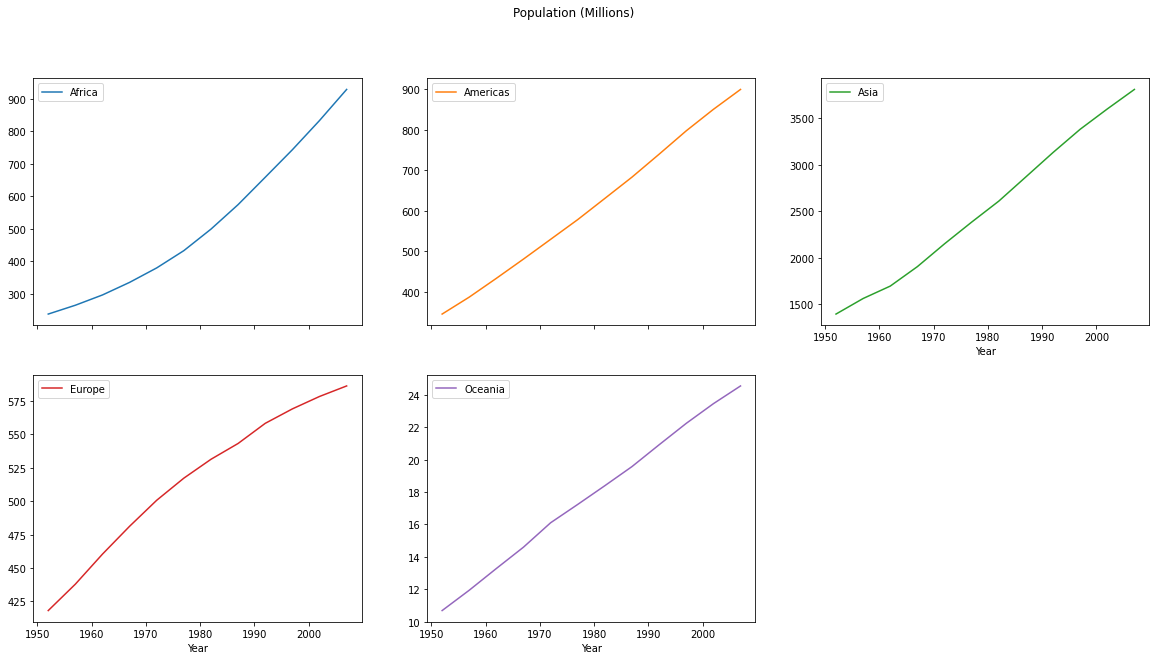

In [878]:
dfallpop.plot.line(x="Year",y=["Africa","Americas","Asia","Europe","Oceania"],title="Population (Millions)",subplots=True,layout=(2,3),figsize=(20,10))
